In [101]:
import seaborn
import json

In [73]:
pd.set_option('max_colwidth', 200)

In [75]:
x = json.load(open('dev_750.pred'))

In [76]:
len(x)

750

In [77]:
df = pd.DataFrame(
    {**{'key': k}, **x[k]}
    for k in x
)

In [78]:
df.f1_top1.sum() / len(df)

0.4685347763347763

### top answer exact match

In [95]:
df = df.assign(score1=df.score.apply(lambda x: x[0]))
score_max = df.score1.max()
df = df.assign(score1=df.score1 / score_max)

In [96]:
cols = ['question', 'answer', 'prediction', 'score1']
df.sort_values(by=['em_top1', 'score1'], ascending=[True, False])[cols].head(20)

,question,answer,prediction,score1
313,who played kirk's mother in star trek,[Jennifer Marie Morrison],"[Joanna Cassidy, Kate Mulgrew., Jane Wyatt, Mimi Kuzyk), Majel Barrett-Roddenberry,, Marina Sirtis, Grace Lee Whitney, Denise Lynn Okuda, Sirtis, Majel Barrett Roddenberry,]",0.992809
145,when did the lion king come out in theaters,"[June 15 , 1994]","[June 24, 1994, February 10, 2004, June 15, 1994, January 21, 1995, 1994, June 24, 1994, June 13, 1994, July 19, 2019]",0.992215
725,who is the original singer of dancing on my own,[Swedish singer Robyn],"[Robyn, Swedish singer Robyn, Sanjaya Malakar., Robyn, Robyn, Martha and the Vandellas, Bill Medley, Nikki Webster, Garth Brooks, Emmet Miller,]",0.991330
414,when did mamma mia film first come out,"[June 30 , 2008]","[July 18, 2008, June 30, 2008, 2008, 1999, July 8, 2008, 1962, 2008, 1999, 2008, 2008]",0.988810
532,who played jt on the young and the restless,[Thaddeus Rowe Luckinbill],"[Thad Luckinbill, Thaddeus Rowe Luckinbill, Jerry Douglas, Jerry Douglas, Michael Graziadei, Kevin Schmidt, Scott Reeves, Robert Parucha, Kristoff St. John, James Michael Gregary]",0.987531
727,who plays the mermaid in pirates of the caribbean on stranger tides,[Àstrid Bergès - Frisbey],"[Àstrid Bergès-Frisbey,, Àstrid Bergès-Frisbey, Kaya Scodelario, Keira Knightley, Gemma Ward, Naomi Wallace, Penélope Cruz), Àstrid Bergès-Frisbey),, Kaya Scodelario., Amy Polumbo]",0.986586
184,who wrote the song because you loved me,[Diane Warren],"[Joy Byers, Diane Warren, Paul Nelson, Barry Mann, Berry Gordy, Kim Williams, Skip Ewing, Darren Hayes, Giorgio Moroder, Diane Warren]",0.985574
426,when did season 2 of the last kingdom come out,[16 March 2017],"[March 2017, 2017, 2017, March, November 11, 2015, December 8, 2017, 2018, 2008, April 1, 2012, July 6, 2014]",0.985378
298,who plays bryce mother in 13 reasons why,[Brenda Strong],"[Alisha Ilhaan Bø, Amy Hargreaves, Giorgia Whigham, Alisha Boe, Alisha Boe, Chelsea Alden, Katherine Langford, Katherine Langford, Walsh, Langford]",0.981596
318,who plays derek's wife in grey's anatomy,[Kate Walsh],"[Sarah Utterback, Sarah White Drew, Kate Walsh, Chyler Leigh., Devine, Kelly McCreary, Ellen Pompeo., Chandra Danette Wilson, Ellen Pompeo)., Kate Walsh]",0.980822


In [97]:
df.sort_values(by=['em_top10', 'score1'], ascending=[True, False])[cols].head(20)

,question,answer,prediction,score1
313,who played kirk's mother in star trek,[Jennifer Marie Morrison],"[Joanna Cassidy, Kate Mulgrew., Jane Wyatt, Mimi Kuzyk), Majel Barrett-Roddenberry,, Marina Sirtis, Grace Lee Whitney, Denise Lynn Okuda, Sirtis, Majel Barrett Roddenberry,]",0.992809
727,who plays the mermaid in pirates of the caribbean on stranger tides,[Àstrid Bergès - Frisbey],"[Àstrid Bergès-Frisbey,, Àstrid Bergès-Frisbey, Kaya Scodelario, Keira Knightley, Gemma Ward, Naomi Wallace, Penélope Cruz), Àstrid Bergès-Frisbey),, Kaya Scodelario., Amy Polumbo]",0.986586
426,when did season 2 of the last kingdom come out,[16 March 2017],"[March 2017, 2017, 2017, March, November 11, 2015, December 8, 2017, 2018, 2008, April 1, 2012, July 6, 2014]",0.985378
298,who plays bryce mother in 13 reasons why,[Brenda Strong],"[Alisha Ilhaan Bø, Amy Hargreaves, Giorgia Whigham, Alisha Boe, Alisha Boe, Chelsea Alden, Katherine Langford, Katherine Langford, Walsh, Langford]",0.981596
99,game of thrones season 7 season 3 release date,"[July 30 , 2017]","[July 16, 2017, mid-2017, March 31, 2013, mid-2017, August 25, 2017, July 16, 2017, 16 July 2017, August 25, 2017 on CD on September 29, 2017, mid 2017, July 16]",0.979985
368,who played kirk's mom in star trek movie,[Jennifer Marie Morrison],"[Joanna Cassidy, Kate Mulgrew., Mimi Kuzyk), Jane Wyatt, Majel Barrett-Roddenberry,, Denise Lynn Okuda, Zoe Saldana,, Kate Mulgrew,, Marina Sirtis, Zoe Saldana,]",0.979601
352,who wrote the song i'm going down,[Norman Whitfield],"[Paul McCartney, Greg Guidry, Sonny Thompson, Jon Stevens, Ricki-Lee Coulter, Freddie King, Nadir Khayat,, Jon Stevens. The song was written by Jon Stevens, Kevin Savigar, St. Louis Jimmy Oden]",0.977890
54,who plays the blonde in orange is the new black,[Taylor Schilling],"[Emma Myles, Diane Guerrero, Natasha Lyonne, Laverne Cox, Abigail Savage, Adrienne C. Moore, Nina Rausch), Laura Gómez, Laverne Cox, Catherine Curtin]",0.976258
112,who plays noel kahn in pretty little liars,[Brant David Daugherty],"[Cody Allen Christian, Keegan Phillip Allen, Shane Coffey, Ian Harding, Ryan Earl Merriman, Tyler Blackburn, Chloe Bridges, Drew Van Acker, Troian Bellisario, Janel Meilani Parrish]",0.974049
730,who plays the police officer in pretty little liars,[Sean Faris],"[Keegan Phillip Allen, Chloe Bridges, Ashley Victoria Benson, Torrey DeVitto., Lesley Fera, Shane Coffey, Troian Bellisario, Ian Harding, Troian Bellisario, Sasha Pieterse-Sheaffer]",0.967332


In [98]:
df.sort_values(by=['Success @ 1', 'score1'], ascending=[True, False])[cols].head(20)

,question,answer,prediction,score1
406,who played the girl in brenda's got a baby video,[Ethel `` Edy '' Proctor],"[Ethel ""Edy"" Proctor, Hanna Adolfsson, Veronica Hamel, Taraji P. Henson, Anzela Abbasi, Davetta Sherwood, Lynn Redgrave, Natalie, Zoe Saldana, Kate Price]",0.994750
313,who played kirk's mother in star trek,[Jennifer Marie Morrison],"[Joanna Cassidy, Kate Mulgrew., Jane Wyatt, Mimi Kuzyk), Majel Barrett-Roddenberry,, Marina Sirtis, Grace Lee Whitney, Denise Lynn Okuda, Sirtis, Majel Barrett Roddenberry,]",0.992809
414,when did mamma mia film first come out,"[June 30 , 2008]","[July 18, 2008, June 30, 2008, 2008, 1999, July 8, 2008, 1962, 2008, 1999, 2008, 2008]",0.988810
532,who played jt on the young and the restless,[Thaddeus Rowe Luckinbill],"[Thad Luckinbill, Thaddeus Rowe Luckinbill, Jerry Douglas, Jerry Douglas, Michael Graziadei, Kevin Schmidt, Scott Reeves, Robert Parucha, Kristoff St. John, James Michael Gregary]",0.987531
184,who wrote the song because you loved me,[Diane Warren],"[Joy Byers, Diane Warren, Paul Nelson, Barry Mann, Berry Gordy, Kim Williams, Skip Ewing, Darren Hayes, Giorgio Moroder, Diane Warren]",0.985574
426,when did season 2 of the last kingdom come out,[16 March 2017],"[March 2017, 2017, 2017, March, November 11, 2015, December 8, 2017, 2018, 2008, April 1, 2012, July 6, 2014]",0.985378
298,who plays bryce mother in 13 reasons why,[Brenda Strong],"[Alisha Ilhaan Bø, Amy Hargreaves, Giorgia Whigham, Alisha Boe, Alisha Boe, Chelsea Alden, Katherine Langford, Katherine Langford, Walsh, Langford]",0.981596
318,who plays derek's wife in grey's anatomy,[Kate Walsh],"[Sarah Utterback, Sarah White Drew, Kate Walsh, Chyler Leigh., Devine, Kelly McCreary, Ellen Pompeo., Chandra Danette Wilson, Ellen Pompeo)., Kate Walsh]",0.980822
99,game of thrones season 7 season 3 release date,"[July 30 , 2017]","[July 16, 2017, mid-2017, March 31, 2013, mid-2017, August 25, 2017, July 16, 2017, 16 July 2017, August 25, 2017 on CD on September 29, 2017, mid 2017, July 16]",0.979985
368,who played kirk's mom in star trek movie,[Jennifer Marie Morrison],"[Joanna Cassidy, Kate Mulgrew., Mimi Kuzyk), Jane Wyatt, Majel Barrett-Roddenberry,, Denise Lynn Okuda, Zoe Saldana,, Kate Mulgrew,, Marina Sirtis, Zoe Saldana,]",0.979601


In [99]:
df.sort_values(by=['Success @ 20', 'score1'], ascending=[True, False]).head(10)

,key,question,answer,prediction,score,title,evidence,em_top1,em_top10,f1_top1,...,recall_top1,recall_top10,q_tokens,Success @ 1,Success @ 2,Success @ 5,Success @ 10,Success @ 15,Success @ 20,score1
406,train_7390,who played the girl in brenda's got a baby video,[Ethel `` Edy '' Proctor],"[Ethel ""Edy"" Proctor, Hanna Adolfsson, Veronica Hamel, Taraji P. Henson, Anzela Abbasi, Davetta Sherwood, Lynn Redgrave, Natalie, Zoe Saldana, Kate Price]","[245.77981567382812, 238.80484008789062, 238.680908203125, 238.33238220214844, 237.97312927246094, 237.70314025878906, 237.66781616210938, 237.57565307617188, 237.19464111328125, 237.0695037841797...","[[Brenda's Got a Baby], [Baby Alice], [Baby Snatcher (film)], [Baby Boy (film)], [Baby (TV series)], [My Baby (Bow Wow song)], [What Ever Happened to Baby Jane? (novel)], [Baby Alice], [Rosemary's...","[2Pac has another song which he made late in his career which deals with this same subject called ""Mama's Just a Little Girl"". The song can be found on his fourth posthumous studio album ""Better D...",True,True,1.000000,...,1.000000,1.000000,[],False,False,False,False,False,False,0.994750
313,train_214,who played kirk's mother in star trek,[Jennifer Marie Morrison],"[Joanna Cassidy, Kate Mulgrew., Jane Wyatt, Mimi Kuzyk), Majel Barrett-Roddenberry,, Marina Sirtis, Grace Lee Whitney, Denise Lynn Okuda, Sirtis, Majel Barrett Roddenberry,]","[245.30029296875, 244.65065002441406, 243.1212158203125, 242.6461181640625, 242.4124755859375, 242.00193786621094, 241.14437866210938, 241.10848999023438, 241.05508422851562, 241.04920959472656, 2...","[[Home (Star Trek: Enterprise)], [Kathryn Janeway], [Metamorphosis (Star Trek: The Original Series)], [List of Star Trek: Discovery episodes], [Cultural influence of Star Trek], [Star Trek Continu...","[Also making an appearance was Michael Reilly Burke as Koss – a character who was first mentioned in the episode """". Burke had previously appeared as a Borg in """" and a Cardassian in """". Also maki...",False,False,0.000000,...,0.000000,0.000000,[],False,False,False,False,False,False,0.992809
426,train_496,when did season 2 of the last kingdom come out,[16 March 2017],"[March 2017, 2017, 2017, March, November 11, 2015, December 8, 2017, 2018, 2008, April 1, 2012, July 6, 2014]","[243.464111328125, 240.85208129882812, 240.62060546875, 238.5853271484375, 237.38253784179688, 236.60513305664062, 235.3585205078125, 235.1339111328125, 234.67803955078125, 234.4173583984375, 234....","[[The Last Kingdom (TV series)], [The Last Kingdom (TV series)], [List of The Last Kingdom episodes], [The Last Kingdom (TV series)], [Kingdom (U.S. TV series)], [The Crown (TV series)], [List of ...","[The Last Kingdom is a British historical fiction television series based on Bernard Cornwell's ""The Saxon Stories"" series of novels. The first series of eight episodes premiered on 10 October 201...",False,False,0.800000,...,0.666667,0.666667,[],False,False,False,False,False,False,0.985378
298,train_2329,who plays bryce mother in 13 reasons why,[Brenda Strong],"[Alisha Ilhaan Bø, Amy Hargreaves, Giorgia Whigham, Alisha Boe, Alisha Boe, Chelsea Alden, Katherine Langford, Katherine Langford, Walsh, Langford]","[242.52964782714844, 242.231201171875, 240.81094360351562, 239.72134399414062, 238.60888671875, 238.47607421875, 237.72689819335938, 237.16845703125, 237.04852294921875, 236.61105346679688, 235.08...","[[Alisha Boe], [Amy Hargreaves], [Giorgia Whigham], [Alisha Boe], [13 Reasons Why], [Chelsea Alden], [Katherine Langford], [13 Reasons Why], [Kate Walsh (actress)], [Katherine Langford], [13 Reaso...","[Alisha Ilhaan Bø (born March 6, 1997), known professionally as Alisha Boe, is a Norwegian actress. She is known for playing Jessica Davis in the Netflix drama series ""13 Reasons Why"". Bø was born...",False,False,0.000000,...,0.000000,0.000000,[],False,False,False,False,False,False,0.981596
99,train_5091,game of thrones season 7 season 3 release date,"[July 30 , 2017]","[July 16

In [100]:
df.sort_values(by=['Success @ 20', 'score1'], ascending=[True, True])[cols].head(10)

,question,answer,prediction,score1
124,channel number of dd national in tata sky,[114],"[601, 17, 601 channels,, 548, over 200, 11, 24x7, 599, 108, 24]",0.753478
524,can you join the american army if your british,[Permanent Residence / Green Card],"[age 16, Army, Sergeant Major, General Officer Scotland, 11,880, British armed forces, 1891, 1775, Army, Gay and lesbian citizens]",0.805063
708,wind in the willows badger's home crossword clue,[the Wild Wood],"[Pont Pill, The St. Johns Bridge, Fairyland Cottages, Top Withens, Top Withens, Ponden Hall,, Top Withens, Castle Keep, Barnet Hill, Wentworth Woodhouse]",0.808764
430,what happened to many manuscripts of anglo-saxon literature,[the Dissolution of the Monasteries],"[destroyed, burnt in the 1731 fire, burned, destroyed, seized and burned, burnt, lost or destroyed, destroyed, burned, destroyed by fires]",0.820106
224,name any 4 democratic countries of the world,"[Sweden, Iceland, New Zealand, Norway]","[Algeria, Israel, Brazil, United States, India, India, India, China, Switzerland, Germany]",0.820474
268,which of the following is most likely to be a limited resource on the floor of a tropical rainforest,[sunlight],"[carbon, diamonds, wood, carbon, carbon, freshwater, dust, oxygen, wood, gold]",0.822174
37,guitnang bayan 2 san mateo rizal zip code,[1850],"[CG-56, CVL-30, P-15, 2, 00653, 93453, 787, MRRV-4408, 1531, P 301]",0.829977
539,the velocity distribution in laminar flow through a circular pipe follows the law,[Hagen -- Poiseuille],"[Poiseuille's law, Poiseuille's law describes the hydraulic resistance, Laminar flow, Laminar, radius, high momentum diffusion, Darcy's Law, velocity, flow velocity, Poiseuille]",0.833156
533,identify and describe three of the challenges facing coastal environments in the 21st century,"[landslides, tsunamis created by submarine earthquakes]","[climate change, climate adaptation, equity, rising sea levels, sustainable and resilient coastal community planning, higher storm surges, coastal erosion, flooding, water pollution, plastic pollu...",0.834381
127,what is the line in the middle of a time zone that in theory determines the time of that zone,[mean solar time],"[convenience of commerce, Civil time, longitude, Temporal frequency, Eastern Time Zone, 49 CFR 71., 0° Horizontal Circle, longitude, the equator, flux capacitor"",]",0.835299


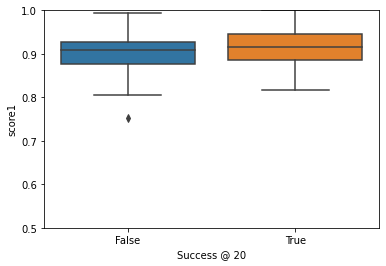

In [91]:
seaborn.boxplot(x='Success @ 20', y='score1', data=df)
_ = plt.ylim([.5, 1])

In [94]:
df['Success @ 10'].value_counts(normalize=True)

True     0.725333
False    0.274667
Name: Success @ 10, dtype: float64

### score distribution
TODO: show the distribution of top K scores broken down by success vs not